## This code is written to investigate how the cost of living in different countries correlates with the actual quality of life.

In [44]:
# import packages
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [13]:
# read custom correct data
mrg = pd.read_excel('results/merged_m.xlsx')
mrg.head(2)

,Rank,Country,Quality_of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Cost_of_Living_Index,Property_Price_to_Income_Ratio,Traffic_Commute_Time_Index,Pollution_Index,Climate_Index,Region
0,1,Netherlands,196.7,107.8,72.7,77.1,68.6,7.2,25.5,23.7,86.8,Western_Europe
1,2,Denmark,194.7,105.0,73.4,79.2,78.6,6.6,28.5,21.3,81.8,Northern_Europe


In [34]:
# extract the columns you need
X = mrg['Quality_of_Life_Index'].values.reshape(-1,1)
y = mrg['Cost_of_Living_Index'].values.reshape(-1,1)
# create a linear regression model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0.5, 0, 'Life Quality')

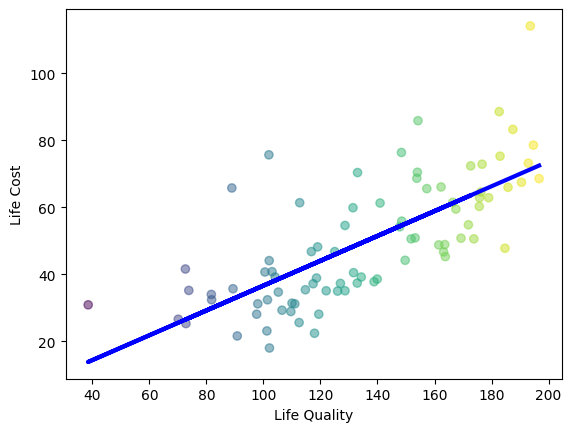

In [40]:
# plot it out
plt.scatter(X, y, c=X, cmap='viridis', alpha=0.5)
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.ylabel('Life Cost')
plt.xlabel('Life Quality')


In [41]:
cost=100
print('The predicted life cost index for a life quality index of '
      +str(cost)+' is', regr.predict(cost)[0][0])

In [ ]:
def predict_cost(life_quality_index):
    return regr.predict(life_quality_index)[0][0]

In [ ]:
cost = 4500
life_quality_index = cost/3200